# Processo Seletivo Analista de dados Júnior - Neurotech

Autor: Marco Mialaret Júnior
    
    1 - Base pública disponibilizada no link: http://insideairbnb.com/get-the-data.html
    2 - Utilize os dados do Airbnb do Rio de Janeiro (listings.csv.gz)
    3 - Faça uma análise exploratória para avaliar a consistência dos dados (pré-processamentos necessários)
   

In [2]:
!pip install scikit-optimize

     |████████████████████████████████| 101 kB 907 kB/s ta 0:00:01
     |████████████████████████████████| 662 kB 1.7 MB/s eta 0:00:01


In [1]:
import numpy as np
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings('ignore')

# Os dados
df = pd.read_csv('listings.csv.gz')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23635 entries, 0 to 23634
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23635 non-null  int64  
 1   listing_url                                   23635 non-null  object 
 2   scrape_id                                     23635 non-null  int64  
 3   last_scraped                                  23635 non-null  object 
 4   name                                          23614 non-null  object 
 5   description                                   22294 non-null  object 
 6   neighborhood_overview                         12824 non-null  object 
 7   picture_url                                   23635 non-null  object 
 8   host_id                                       23635 non-null  int64  
 9   host_url                                      23635 non-null 

Após a análise do dicionário de dados decidi selecionar as características que identificavam o imóvel ou que apresentavam alguma característica importante da região. Sendo assim, selecionei as seguintes variáveis:


In [3]:
data = df[['host_id','latitude','longitude','price','has_availability','number_of_reviews','review_scores_rating','review_scores_location','review_scores_value','instant_bookable','number_of_reviews','room_type']]

In [4]:
data.describe()

,host_id,latitude,longitude,number_of_reviews,review_scores_rating,review_scores_location,review_scores_value,number_of_reviews
count,2.363500e+04,23635.000000,23635.000000,23635.000000,14980.000000,14500.000000,14501.000000,23635.000000
mean,1.017046e+08,-22.966148,-43.249278,13.207489,4.577253,4.847638,4.630632,13.207489
std,1.110507e+08,0.035113,0.097131,31.962546,0.961930,0.377966,0.510273,31.962546
min,3.607000e+03,-23.072620,-43.720990,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1.407128e+07,-22.984680,-43.306905,0.000000,4.630000,4.850000,4.500000,0.000000
50%,6.029813e+07,-22.972000,-43.196360,2.000000,4.880000,5.000000,4.750000,2.000000
75%,1.562663e+08,-22.951960,-43.186300,10.000000,5.000000,5.000000,5.000000,10.000000
max,4.131633e+08,-22.749690,-43.104400,466.000000,5.000000,5.000000,5.000000,466.000000


Escolhi não retirar os NaN para não prejudicar os host que não foram avaliados recentemente.Vou substituir as avaliações faltantes pela média dos imóveis da região.

In [5]:
X = pd.concat([pd.Series(data.latitude), pd.Series(data.longitude)], axis=1)
kmeans = KMeans(n_clusters=100, random_state=0).fit(X)
kmeans.labels_

array([ 7, 31,  2, ..., 99, 31,  7], dtype=int32)

In [6]:
score_ratings = []
score_locations = []
score_values = []
for row in data.iterrows():
  if pd.isnull(row[1][6]):
    label = kmeans.predict([[row[1][1],row[1][2]]])
    score_ratings.append(data[kmeans.labels_ == label]['review_scores_rating'].mean())
  else:
    score_ratings.append(row[1][6])

  if pd.isnull(row[1][7]):
    label = kmeans.predict([[row[1][1],row[1][2]]])
    score_locations.append(data[kmeans.labels_ == label]['review_scores_location'].mean())
  else:
    score_locations.append(row[1][7])

  if pd.isnull(row[1][8]):
    label = kmeans.predict([[row[1][1],row[1][2]]])
    score_values.append(data[kmeans.labels_ == label]['review_scores_value'].mean())
  else:
    score_values.append(row[1][8])


data['review_scores_rating']= np.array(score_ratings)
data['review_scores_location']= np.array(score_locations)
data['review_scores_value'] = np.array(score_values)

In [7]:
#aparentemente todos os NaN foram substituídos
data.isnull().sum()

host_id                   0
latitude                  0
longitude                 0
price                     0
has_availability          0
number_of_reviews         0
review_scores_rating      0
review_scores_location    0
review_scores_value       0
instant_bookable          0
number_of_reviews         0
room_type                 0
dtype: int64

In [8]:
data.describe()

,host_id,latitude,longitude,number_of_reviews,review_scores_rating,review_scores_location,review_scores_value,number_of_reviews
count,2.363500e+04,23635.000000,23635.000000,23635.000000,23635.000000,23635.000000,23635.000000,23635.000000
mean,1.017046e+08,-22.966148,-43.249278,13.207489,4.567779,4.834267,4.631748,13.207489
std,1.110507e+08,0.035113,0.097131,31.962546,0.771047,0.307644,0.403534,31.962546
min,3.607000e+03,-23.072620,-43.720990,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1.407128e+07,-22.984680,-43.306905,0.000000,4.525491,4.797490,4.580542,0.000000
50%,6.029813e+07,-22.972000,-43.196360,2.000000,4.670000,4.910000,4.665833,2.000000
75%,1.562663e+08,-22.951960,-43.186300,10.000000,4.970000,5.000000,4.830000,10.000000
max,4.131633e+08,-22.749690,-43.104400,466.000000,5.000000,5.000000,5.000000,466.000000


## Construção de mapas interativos

Primeiros testes com a biblioteca folium.

A vizualização dos dados é um processo muito importante na análise exploratória, nesta etapa podemos tirar informações importantes que podem nos ajudar no processo de determinação dos métodos de Machine Learning que serão usados.

**A Lib Folium não funcionou muito bem nos meus testes no colab.**

In [9]:
latitude, longitude, tipo = data.latitude, data.longitude, data.room_type
price = data.price
rating = data.review_scores_rating
vizinhanca = data.review_scores_location


Fiz a localização dos 100 primeiros apartamentos colocando um token que informa a feature 'room_type' em popup. Caso o usuário clique no token será exibido a classificação geral e preço da estadia.

In [10]:
import folium

mapa = folium.Map(
    location=[-22.96599,-43.17940],
    tiles='Stamen Terrain',
    zoom_start=14
)
#usei um valor baixo para i por estar usando um laço for
for i in range(100):
    folium.Marker(
        [latitude[i], longitude[i]],
        popup= [rating[i],price[i]],        
        tooltip=tipo[i]
        ).add_to(mapa)
    

mapa

No segundo gráfico temos o Heatmap da avaliação da vizinhança por localidade, seria uma informação muito importante para os usuários perceberam a percepção que as pessoas tiveram da região do apartamento.

In [11]:

from folium import plugins

coordenadas=[]
for lat,lng,viz in zip(data.latitude.values,data.longitude.values,vizinhanca):
  coordenadas.append([lat,lng,viz])


mapa = folium.Map(location=[-22.96599,-43.17940],zoom_start=12,tiles='Stamen Toner')
mapa.add_child(plugins.HeatMap(coordenadas))
mapa

Juntando as duas formas de visualização, o usuário pode ter uma noção do custo/benefício envolvido.

**obs.: eu ia deixar os token disponíveis para aluguel azul e os indisponíveis vermelho.Mas faltou tempo**

In [12]:
mapa = folium.Map(
    location=[-22.96599,-43.17940],
    tiles='Stamen Terrain',
    zoom_start=25
)
#usei um valor baixo para i por estar usando um laço for
for i in range(100):
    folium.Marker(
        [latitude[i], longitude[i]],
        popup= [rating[i],price[i]],        
        tooltip=tipo[i]
        ).add_to(mapa)
mapa.add_child(plugins.HeatMap(coordenadas))
mapa    

## Mais Transformação dos dados

In [13]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import joblib
from joblib import Parallel,delayed
from sklearn.metrics import accuracy_score

from skopt import Optimizer, gp_minimize
from skopt.space import Integer,Categorical
from skopt.utils import use_named_args

Fazendo mais algumas manipulações nos dados.

In [14]:
precos =data['price']
precos = [s.replace('$','') for s in precos]
precos = [s.replace(',','') for s in precos]

data['price']=precos
data['price'] = pd.to_numeric(data['price'])

data['has_availability'] = data['has_availability'].map({'t':1,'f':0})
data['instant_bookable'] = data['instant_bookable'].map({'t':1,'f':0})

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23635 entries, 0 to 23634
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_id                 23635 non-null  int64  
 1   latitude                23635 non-null  float64
 2   longitude               23635 non-null  float64
 3   price                   23635 non-null  float64
 4   has_availability        23635 non-null  int64  
 5   number_of_reviews       23635 non-null  int64  
 6   review_scores_rating    23635 non-null  float64
 7   review_scores_location  23635 non-null  float64
 8   review_scores_value     23635 non-null  float64
 9   instant_bookable        23635 non-null  int64  
 10  number_of_reviews       23635 non-null  int64  
 11  room_type               23635 non-null  object 
dtypes: float64(6), int64(5), object(1)
memory usage: 2.2+ MB


In [16]:
y = data.room_type.values.reshape(-1,1)
X = data.drop('room_type', axis=1)

#Transformar room_type com ordinalEncoder

ordinal = OrdinalEncoder()
y = ordinal.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16544, 11), (7091, 11), (16544, 1), (7091, 1))

In [17]:
y = y.ravel()

## Classificador

### Random Forest - Sem Otimização de hiperâmetros.

Para fugir dos problemas que os métodos de correlação linear podem trazer na análise de dados, resolvi usar uma random forest na busca da feature importance.

In [18]:
feat_labels = ['host_id','latitude','longitude','price','has_availability','number_of_reviews','review_scores_rating','review_scores_location','review_scores_value','instant_bookable','number_of_reviews','room_type']


# Um Classificador random Forest
clf = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1)

# Treinamento
clf.fit(X_train, y_train)

# Print dos features e da importância de cada uma delas
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)


('host_id', 0.139240252612068)
('latitude', 0.1579423293297612)
('longitude', 0.15202815236498765)
('price', 0.282463964702582)
('has_availability', 0.0)
('number_of_reviews', 0.0431860517292178)
('review_scores_rating', 0.05210401043729132)
('review_scores_location', 0.04953320723118176)
('review_scores_value', 0.06195893633955483)
('instant_bookable', 0.01869359166361182)
('number_of_reviews', 0.04284950358974352)


In [19]:
from sklearn.feature_selection import SelectFromModel
# Fazendo uma análise rápida montei um lista com as features com score maior que 0.13
sfm = SelectFromModel(clf, threshold=0.13)

# Train the selector
sfm.fit(X_train, y_train)


SelectFromModel(estimator=RandomForestClassifier(n_estimators=1000, n_jobs=-1,
                                                 random_state=42),
                threshold=0.13)

In [20]:
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [21]:
# Nova random forest classifier com as características mais importantes
clf_important = RandomForestClassifier(n_estimators=5000, random_state=42, n_jobs=-1)

# treinamento
clf_important.fit(X_important_train, y_train)


RandomForestClassifier(n_estimators=5000, n_jobs=-1, random_state=42)

In [22]:
from sklearn.metrics import accuracy_score

# Predição
y_pred = clf.predict(X_test)

# Precisão do modelo
accuracy_score(y_test, y_pred)


0.7921308701170497

### Random Forest - Com Otimização de hiperâmetros.

In [23]:

#pipeline para realizar o treino
pipeline = Pipeline(steps=[('scaler', MinMaxScaler()),
                           ('model',RandomForestClassifier(random_state=0))])

In [24]:
param_grid =[Integer(3,500,name='model__max_depth'),
             Integer(1,500,name='model__n_estimators'),
             Integer(3,X_train.shape[1],name='model__max_features'),
             Integer(2,20,name='model__min_samples_split'),
             Integer(2,20,name='model__min_samples_leaf')]  

In [25]:
@use_named_args(param_grid)
def objective(**params):

  pipeline.set_params(**params)

  value = cross_val_score(pipeline,
                          X_train,
                          y_train,
                          cv=3,
                          scoring='accuracy',
                          n_jobs=-1).mean()
  
  return -value

In [26]:
optimizer = Optimizer(
    dimensions=param_grid, 
    base_estimator='GP', 
    n_initial_points=10,
    acq_func='EI', 
    n_jobs=4)

In [29]:
%%time 

for i in range(4):
  x = optimizer.ask(n_points=5)
  y = Parallel(n_jobs=4)(delayed(objective)(v) for v in x)
  optimizer.tell(x,y)

/home/matmj/phd/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/matmj/phd/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/matmj/phd/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/matmj/phd/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. 

CPU times: user 15 s, sys: 4.96 s, total: 20 s
Wall time: 3min 6s


<AxesSubplot:>

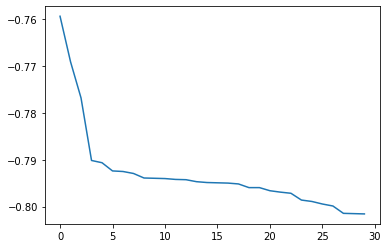

In [30]:
tmp = pd.concat([pd.DataFrame(optimizer.Xi), pd.Series(optimizer.yi)], axis=1)
tmp.columns = ['max_depth','n_estimators','max_features','min_samples_split','min_samples_leaf','accuracy']
tmp['accuracy'].sort_values(ascending=False).reset_index(drop=True).plot()

In [31]:
tmp.sort_values(by='accuracy',ascending=True, inplace=True)
tmp.head()

,max_depth,n_estimators,max_features,min_samples_split,min_samples_leaf,accuracy
21,108,318,7,2,2,-0.801559
13,235,498,7,7,2,-0.801498
12,487,316,11,2,3,-0.801438
20,125,253,11,6,4,-0.799867
4,87,153,11,11,4,-0.799443


In [32]:
pipeline.set_params(**{'model__max_depth':108,
                     'model__n_estimators':318,
                     'model__max_features':7,
                     'model__min_samples_split':2,
                     'model__min_samples_leaf':2})

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=108, max_features=7,
                                        min_samples_leaf=2, n_estimators=318,
                                        random_state=0))])

In [33]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=108, max_features=7,
                                        min_samples_leaf=2, n_estimators=318,
                                        random_state=0))])

In [34]:
accuracy_score(y_test,pipeline.predict(X_test))

0.7915667747849386

# Seleção de Características e Classificador